# Titanic

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [120]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Null values

In [121]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**Fill those null values**

In [122]:
titanic.age.mean(), titanic.age.median()

(29.69911764705882, 28.0)

In [123]:
titanic['age'].fillna(titanic.age.median(), inplace=True)

*deck column has more than 50% null values so drop the entire column*

In [124]:
titanic.drop('deck', axis=1, inplace=True)

*embarked and embarked_town has only 2 null values so drop these rows*

In [125]:
titanic.dropna(inplace=True)

In [126]:
titanic.shape

(889, 14)

## Encoding

In [127]:
df = titanic.copy()

In [128]:
# String columns
df.select_dtypes(include=['object']).columns

Index(['sex', 'embarked', 'who', 'embark_town', 'alive'], dtype='object')

**sex column**

In [129]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [130]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

**embarked column**

In [131]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [132]:
df_encoded = pd.get_dummies(df['embarked'], drop_first=True, prefix='embarked').astype(int)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop('embarked', axis=1)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,0,1
1,1,1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,0,0
2,1,3,1,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0,1


**embark_town**

In [133]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [134]:
df_encoded = pd.get_dummies(df['embark_town'], drop_first=True, prefix='embark_town').astype(int)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop('embark_town', axis=1)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton
0,0,3,0,22.0,1,0,7.2500,Third,man,True,no,False,0,1,0,1
1,1,1,1,38.0,1,0,71.2833,First,woman,False,yes,False,0,0,0,0
2,1,3,1,26.0,0,0,7.9250,Third,woman,False,yes,True,0,1,0,1


**class col**

In [135]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [136]:
df_encoded = pd.get_dummies(df['class'], drop_first=True, prefix='class').astype(int)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop('class', axis=1)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alive,alone,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third
0,0,3,0,22.0,1,0,7.2500,man,True,no,False,0,1,0,1,0,1
1,1,1,1,38.0,1,0,71.2833,woman,False,yes,False,0,0,0,0,0,0
2,1,3,1,26.0,0,0,7.9250,woman,False,yes,True,0,1,0,1,0,1


**who, adultMale, alone cols**

In [137]:
def unique_col_values(cols):
    for col in cols:
        print(f'{col} \t {df[col].unique()}')

In [138]:
unique_col_values(['who', 'alone', 'adult_male'])

who 	 ['man' 'woman' 'child']
alone 	 [False  True]
adult_male 	 [ True False]


In [139]:
# Encoding 'who' column
df_encoded = pd.get_dummies(df['who'], drop_first=True, prefix='who').astype(int)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop('who', axis=1)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third,who_man,who_woman
0,0,3,0,22.0,1,0,7.2500,True,no,False,0,1,0,1,0,1,1,0
1,1,1,1,38.0,1,0,71.2833,False,yes,False,0,0,0,0,0,0,0,1
2,1,3,1,26.0,0,0,7.9250,False,yes,True,0,1,0,1,0,1,0,1


In [140]:
df['alone'] = df['alone'].astype(int)
df['adult_male'] = df['adult_male'].astype(int)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third,who_man,who_woman
0,0,3,0,22.0,1,0,7.2500,1,no,0,0,1,0,1,0,1,1,0
1,1,1,1,38.0,1,0,71.2833,0,yes,0,0,0,0,0,0,0,0,1
2,1,3,1,26.0,0,0,7.9250,0,yes,1,0,1,0,1,0,1,0,1


**alive col**  
It is same as 'survived' col. So, drop it.

In [141]:
df = df.drop('alive', axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third,who_man,who_woman
0,0,3,0,22.0,1,0,7.2500,1,0,0,1,0,1,0,1,1,0
1,1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,1
2,1,3,1,26.0,0,0,7.9250,0,1,0,1,0,1,0,1,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,0,1,0,1,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,1,1,0,1,0,1,0,1,1,0


## Finding Optimal Models and Hyperparameters

In [142]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
X = df.drop('survived', axis=1)
y = df['survived']

In [145]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf']
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5, 10],
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    }
}

In [146]:
scores = []

for model_name, mp in model_params.items():
    print(f'Running {model_name} model...')
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

Running svm model...
Running knn model...
Running decision_tree model...
Running random_forest model...
Running logistic_regression model...
Running naive_bayes_gaussian model...


Running naive_bayes_multinomial model...


,model,best_score,best_params
0,svm,0.739034,"{'C': 10, 'kernel': 'rbf'}"
1,knn,0.723303,{'n_neighbors': 5}
2,decision_tree,0.781788,{'criterion': 'gini'}
3,random_forest,0.805421,{'n_estimators': 10}
4,logistic_regression,0.816702,{'C': 10}
5,naive_bayes_gaussian,0.803180,{}
6,naive_bayes_multinomial,0.699689,{}


**Here, the best model is LogisticRegression (C=10)**

## LogisticRegression

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [149]:
lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10)
lr.fit(X_train, y_train)

LogisticRegression(C=10, solver='liblinear')

In [150]:
lr.score(X_test, y_test)

0.8314606741573034

## Model Performance Analysis
Confusion Matrix

In [151]:
y_predicted = lr.predict(X_test)

In [152]:
from sklearn.metrics import confusion_matrix

In [153]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[95,  7],
       [23, 53]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

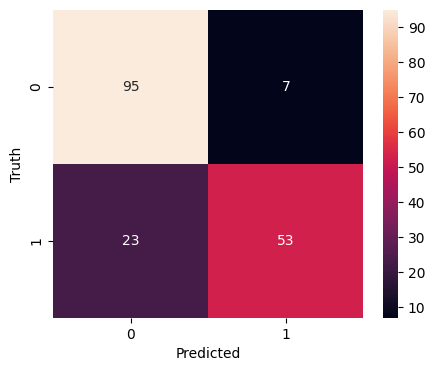

In [154]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')